In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
import rpy2
# magic execute R script
%load_ext rpy2.ipython

R[write to console]: During startup - 
R[write to console]: Warning messages:

R[write to console]: 1: Setting LC_CTYPE failed, using "C" 

R[write to console]: 2: Setting LC_COLLATE failed, using "C" 

R[write to console]: 3: Setting LC_TIME failed, using "C" 

R[write to console]: 4: Setting LC_MESSAGES failed, using "C" 

R[write to console]: 5: Setting LC_MONETARY failed, using "C" 

R[write to console]: 6: Setting LC_PAPER failed, using "C" 

R[write to console]: 7: Setting LC_MEASUREMENT failed, using "C" 



# Data

## load genotype

In [3]:
# get genotype col names
vcf_file = 'data/ADNI_JansenNG_33gene_unimputed.vcf'
with open(vcf_file, 'r') as f_vcf:
    while True:
        line = f_vcf.readline()
        if line[:2]!='##':
            break

    col_names = line[1:].split()
        
# print(col_names)

In [4]:
# load genotype
vcf_file = 'data/ADNI_JansenNG_33gene_unimputed.vcf'
vcf_genotype = pd.read_csv(
    vcf_file,
    sep='\t',
    header=None,
    names=col_names,
    comment='#')

vcf_genotype

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,2_123_S_0108,...,2_141_S_1245,2_941_S_1194,2_941_S_1295,2_941_S_1311,2_941_S_1363,2_002_S_4264,2_021_S_2077,2_024_S_4186,2_128_S_2057,2_941_S_4066
0,1,161111931,rs10908824,A,G,.,.,PR,GT,0/0,...,0/1,1/1,0/0,0/0,0/1,0/1,0/0,0/0,0/1,0/0
1,1,161116022,rs11589567,G,T,.,.,PR,GT,0/0,...,0/1,1/1,0/0,0/0,0/1,0/1,0/0,0/0,0/1,0/0
2,1,161122903,rs4656988,G,A,.,.,PR,GT,0/1,...,0/1,1/1,0/1,0/0,0/1,0/1,0/1,0/1,0/1,0/0
3,1,161135421,rs3402,C,T,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
4,1,161135559,rs2502806,G,A,.,.,PR,GT,0/0,...,0/1,0/0,0/1,0/0,0/1,0/1,0/1,0/1,0/1,0/0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,20,55057904,rs6064401,G,A,.,.,PR,GT,0/1,...,0/1,0/1,0/0,0/1,0/1,0/1,0/1,1/1,0/1,0/1
1779,20,55062564,rs6092321,A,G,.,.,PR,GT,0/0,...,0/0,0/1,1/1,0/1,0/0,0/0,0/0,0/0,0/1,0/1
1780,20,55072472,rs6024911,G,A,.,.,PR,GT,0/0,...,0/0,0/1,1/1,0/1,0/0,0/0,0/0,0/0,0/1,0/1
1781,20,55078533,rs3827108,T,C,.,.,PR,GT,0/1,...,0/1,0/0,0/0,0/0,0/1,0/1,0/1,0/0,0/0,0/0


In [5]:
# replace genotype with integers
vcf_int = vcf_genotype.replace({
    './.': np.NaN,
    '0/0': 0,
    '0/1': 1,
    '1/0': 1,
    '1/1': 2
})

vcf_int

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,2_123_S_0108,...,2_141_S_1245,2_941_S_1194,2_941_S_1295,2_941_S_1311,2_941_S_1363,2_002_S_4264,2_021_S_2077,2_024_S_4186,2_128_S_2057,2_941_S_4066
0,1,161111931,rs10908824,A,G,.,.,PR,GT,0,...,1,2,0,0,1,1,0,0,1,0
1,1,161116022,rs11589567,G,T,.,.,PR,GT,0,...,1,2,0,0,1,1,0,0,1,0
2,1,161122903,rs4656988,G,A,.,.,PR,GT,1,...,1,2,1,0,1,1,1,1,1,0
3,1,161135421,rs3402,C,T,.,.,PR,GT,0,...,0,0,0,0,0,0,0,0,0,0
4,1,161135559,rs2502806,G,A,.,.,PR,GT,0,...,1,0,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,20,55057904,rs6064401,G,A,.,.,PR,GT,1,...,1,1,0,1,1,1,1,2,1,1
1779,20,55062564,rs6092321,A,G,.,.,PR,GT,0,...,0,1,2,1,0,0,0,0,1,1
1780,20,55072472,rs6024911,G,A,.,.,PR,GT,0,...,0,1,2,1,0,0,0,0,1,1
1781,20,55078533,rs3827108,T,C,.,.,PR,GT,1,...,1,0,0,0,1,1,1,0,0,0


In [6]:
# snp matrix with shape of (SNP loci, individual)
snp_ind_matrix = vcf_int.iloc[:, 9:]
snp_ind_matrix

,2_123_S_0108,2_024_S_0985,2_131_S_0123,2_098_S_0160,2_027_S_0256,2_116_S_1243,2_073_S_2264,2_094_S_2216,2_021_S_0337,2_141_S_1255,...,2_141_S_1245,2_941_S_1194,2_941_S_1295,2_941_S_1311,2_941_S_1363,2_002_S_4264,2_021_S_2077,2_024_S_4186,2_128_S_2057,2_941_S_4066
0,0,0,1,2,0,0,1,0,0,1,...,1,2,0,0,1,1,0,0,1,0
1,0,0,1,2,0,0,1,0,0,1,...,1,2,0,0,1,1,0,0,1,0
2,1,0,1,2,0,0,1,0,1,1,...,1,2,1,0,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,2,1,1,1,1,1,...,1,0,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,1,2,1,0,0,2,1,2,1,1,...,1,1,0,1,1,1,1,2,1,1
1779,0,0,0,0,1,0,0,0,0,1,...,0,1,2,1,0,0,0,0,1,1
1780,0,0,0,0,1,0,0,0,0,1,...,0,1,2,1,0,0,0,0,1,1
1781,1,0,1,2,1,0,1,0,1,0,...,1,0,0,0,1,1,1,0,0,0


In [7]:
# transposition is necessary.
ind_snp_matrix = snp_ind_matrix.transpose()
ind_snp_matrix

,0,1,2,3,4,5,6,7,8,9,...,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782
2_123_S_0108,0,0,1,0,0,1,0,1,1,0,...,1,1,1,1,1,1,0,0,1,1
2_024_S_0985,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,2
2_131_S_0123,1,1,1,0,1,1,1,0,0,0,...,1,1,1,1,1,1,0,0,1,1
2_098_S_0160,2,2,2,0,0,2,2,0,0,2,...,2,2,2,2,2,0,0,0,2,0
2_027_S_0256,0,0,0,0,2,0,0,0,0,0,...,1,1,1,1,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2_002_S_4264,1,1,1,0,1,1,1,0,0,1,...,0,0,0,1,1,1,0,0,1,1
2_021_S_2077,0,0,1,0,1,1,1,0,0,0,...,1,1,1,1,1,1,0,0,1,1
2_024_S_4186,0,0,1,0,1,1,0,1,1,0,...,0,0,0,0,0,2,0,0,0,2
2_128_S_2057,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,1,1,1,0,1


## load phenotype

In [8]:
# load phenotype
ADAS_file = 'data/ADAS_selected.csv'
ADAS_data = pd.read_csv(ADAS_file, sep=',', header=0)
ADAS_data = ADAS_data.dropna()
ADAS_data

,RID,TOTSCORE,TOTAL13
0,31,5.0,10.0
1,35,6.0,13.0
2,47,8.0,14.0
3,51,9.0,20.0
4,58,5.0,10.0
...,...,...,...
930,5283,3.0,7.0
931,5287,3.0,4.0
932,5288,6.0,8.0
933,5290,5.0,6.0


In [9]:
ADAS_data[['TOTSCORE','TOTAL13']].describe()

,TOTSCORE,TOTAL13
count,930.000000,930.000000
mean,10.259140,16.009677
std,7.352463,10.353541
min,0.000000,0.000000
25%,5.000000,9.000000
50%,8.000000,13.000000
75%,13.000000,21.000000
max,52.000000,67.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e9b43c860>,
      dtype=object)

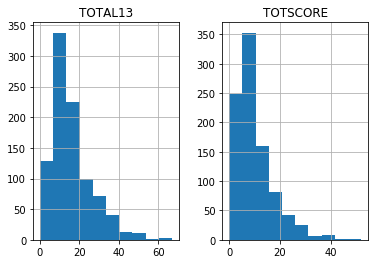

In [10]:
ADAS_data[['TOTSCORE','TOTAL13']].hist()

In [11]:
Y = np.asarray(ADAS_data['TOTSCORE'])

In [25]:
# normlization
Y = (Y - Y.min()) / (Y.max() - Y.min())

## Intersection

In [26]:
genetic_id = [x[-4:] for x in ind_snp_matrix.index]
rid = ['{:04d}'.format(x) for x in ADAS_data['RID']]

In [27]:
row_id = [genetic_id.index(x) for x in rid]

In [28]:
X = ind_snp_matrix.iloc[row_id, :]
X

,0,1,2,3,4,5,6,7,8,9,...,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782
2_023_S_0031,1,1,1,0,1,1,1,0,0,1,...,2,2,2,2,2,0,0,0,2,0
2_100_S_0035,0,0,1,0,1,1,0,1,1,0,...,1,1,1,1,1,1,0,0,1,1
2_100_S_0047,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,1
2_099_S_0051,2,2,2,1,0,2,2,0,0,2,...,0,1,1,1,1,1,0,0,1,1
2_023_S_0058,0,0,0,0,2,0,0,0,0,0,...,1,0,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2_036_S_5283,2,2,2,1,0,2,2,0,0,2,...,1,2,2,2,2,0,0,0,2,0
2_053_S_5287,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,1
2_027_S_5288,0,0,0,0,2,0,0,0,0,0,...,1,1,1,1,1,1,0,0,1,1
2_024_S_5290,1,1,1,1,1,1,1,0,0,1,...,1,1,1,1,1,1,0,0,1,1


## Split train and test

In [29]:
# split df to train and valid
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.1)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((837, 1783), (93, 1783), (837,), (93,))

In [30]:
# split df to train and valid
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X_train, Y_train, test_size=0.1)

X_train.shape, X_valid.shape, Y_train.shape, Y_valid.shape

((753, 1783), (84, 1783), (753,), (84,))

# Method 

## Training

In [31]:
%%R -i X_train,Y_train,X_valid,Y_valid,X_test,Y_test
# imported variables are seperated by ',', no space
library('glmnet')

# cross validation to optimize lasso
cv_main <- cv.glmnet(as.matrix(X_train), as.matrix(Y_train), nfolds=5)

cv_main$lambda.min

[1] 0.01406496


In [32]:
%%R
blup_main <- glmnet(
  as.matrix(X_train),
  as.matrix(Y_train),
  alpha = 1,
  lambda = cv_main$lambda.min,
  intercept = TRUE
)

blup_main
blup_main$a0

      s0 
0.186429 


# Prediction

In [33]:
%%R -o Y_predict
# -o: R to Python
# predict

# using cv.glmnet model
# predicted_results <- predict(cv_main, type = "class", newx = as.matrix(test_X))

# using glmnet model
Y_predict <- predict(blup_main, type = "class", newx = as.matrix(X_test))

In [34]:
r2_score(Y_test, Y_predict[:, 0])

0.036006156116200394

In [35]:
mean_squared_error(Y_test, Y_predict[:, 0])

0.026047693622009597

# Plot

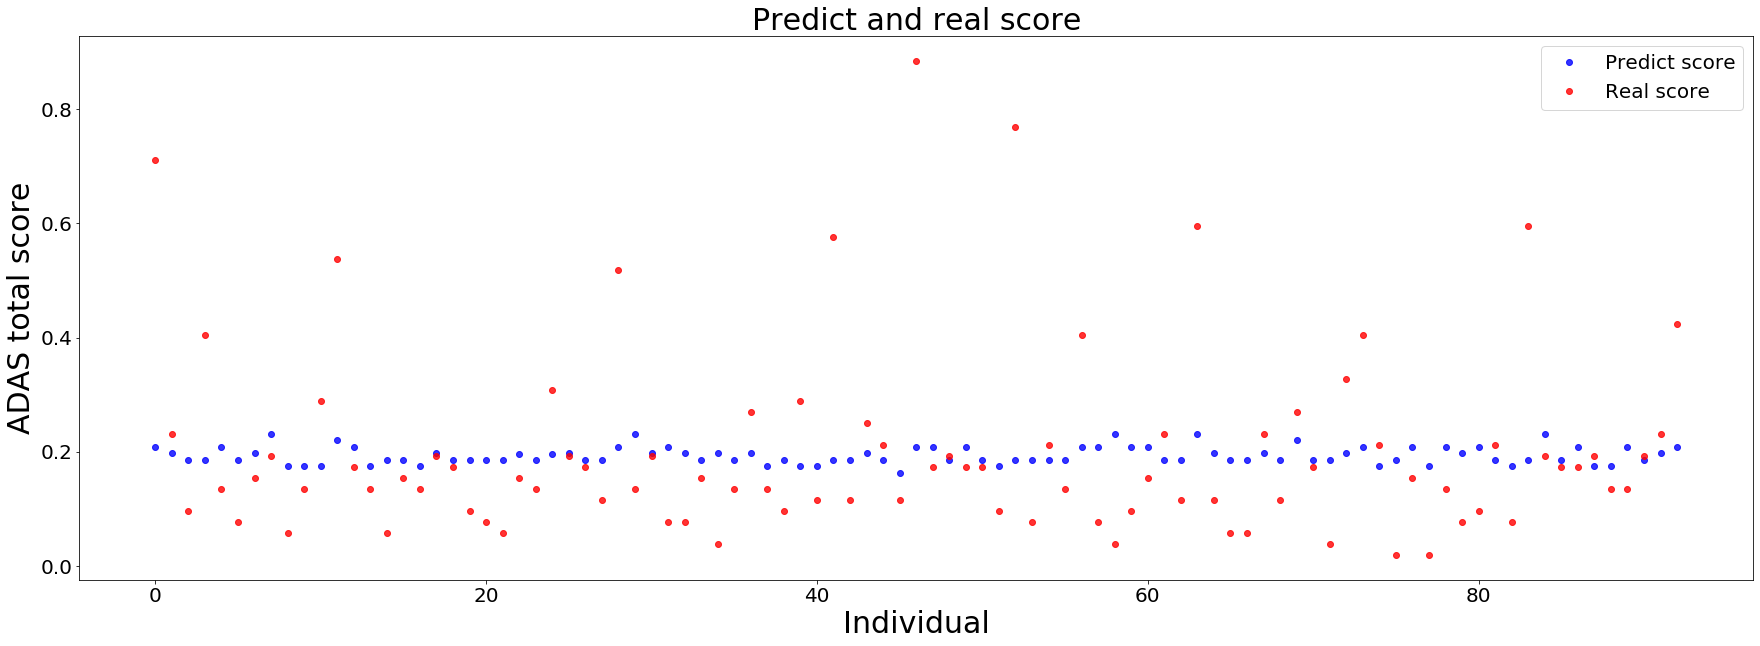

In [36]:
plt.figure(figsize=(30,10))
plt.plot(range(len(Y_test)), Y_predict, 'bo', alpha=0.8,label='Predict score')
plt.plot(range(len(Y_test)), Y_test, 'ro', alpha=0.8,label='Real score')
plt.legend(fontsize=20)
plt.tick_params(labelsize=20)

plt.title('Predict and real score',fontsize=30)
plt.xlabel('Individual', fontsize=30)
plt.ylabel('ADAS total score', fontsize=30)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e97239e48>]],
      dtype=object)

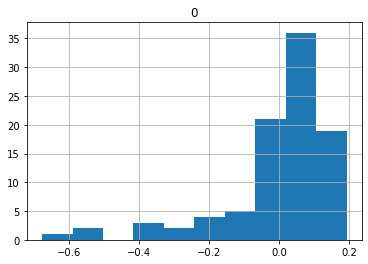

In [37]:
# difference histgram
diff=(Y_predict[:,0]-Y_test)
pd.DataFrame(diff).hist()